In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Data Science WorkSpace/Data Science Projects/DBSCAN in Python with Scikit-Learn/housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
len(df)

20640

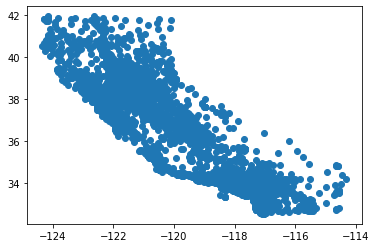

In [32]:
lat_long = df[['latitude', 'longitude']]
lat, longg = df.latitude, df.longitude

plt.scatter(longg, lat)

In [33]:
from sklearn.cluster import DBSCAN

X = lat_long.to_numpy()

X.shape

(20640, 2)

In [34]:
dbscan_cluster_model = DBSCAN(eps=0.2, min_samples=15).fit(X)
dbscan_cluster_model

DBSCAN(eps=0.2, min_samples=15)

In [35]:
df['cluster'] = dbscan_cluster_model.labels_

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0


In [36]:
df['cluster'].value_counts()

 6    11249
 0     8545
-1      443
 2      109
 1       98
 3       98
 5       27
 7       22
 8       18
 9       16
 4       15
Name: cluster, dtype: int64

In [37]:
import plotly.express as px

fig = px.scatter(x=longg, y=lat, color=df['cluster'])

fig.show()

In [38]:
from sklearn.metrics import silhouette_score as ss

ss(X, df['cluster'])

0.21921057255397758

In [39]:
epsilons = np.linspace(0.01, 1, num=15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [40]:
min_samples = np.arange(2, 20, step=3)
min_samples 

array([ 2,  5,  8, 11, 14, 17])

In [41]:
import itertools 

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [42]:
N = len(combinations)
N

90

In [43]:
def get_scores_and_labels(combinations, X):
    scores = []
    all_labels_list = []

    for i, (eps, num_samples) in enumerate(combinations):
        dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -= 1
        
        if (num_clusters < 2) or (num_clusters > 50):
            scores.append(-10)
            all_labels_list.append('bad')
            c = (eps, num_samples)
            print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clustes. Moving on")
            continue

        scores.append(ss(X, labels))
        all_labels_list.append(labels)
        print(f"Index: {i}, Score: {scores[-1]}, 'Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]

    return {
        'best_epsilon': best_parameters[0],
        'best_min_samples': best_parameters[1],
        'best_labels': best_labels,
        'best_score': best_score
    }

In [44]:
best_dict = get_scores_and_labels(combinations, X)

Combination (0.01, 2) on iteration 1 of 90 has 2391 clustes. Moving on
Combination (0.01, 5) on iteration 2 of 90 has 1114 clustes. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 543 clustes. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 262 clustes. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 128 clustes. Moving on
Combination (0.01, 17) on iteration 6 of 90 has 65 clustes. Moving on
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 124 clustes. Moving on
Combination (0.08071428571428571, 5) on iteration 8 of 90 has 72 clustes. Moving on
Combination (0.08071428571428571, 8) on iteration 9 of 90 has 58 clustes. Moving on
Combination (0.08071428571428571, 11) on iteration 10 of 90 has 54 clustes. Moving on
Index: 10, Score: 0.23660136566339013, 'Labels: [ 0  0  0 ... -1 -1 -1], NumClusters: 49
Index: 11, Score: 0.2320816966670719, 'Labels: [ 0  0  0 ... -1 -1 -1], NumClusters: 47
Combination (0.15142857142857144, 2) on iteration 13 of 90 h

In [45]:
best_dict

{'best_epsilon': 0.22214285714285714,
 'best_min_samples': 8,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0]),
 'best_score': 0.32086158405428405}

In [46]:
df['cluster'] = best_dict['best_labels']

df['cluster'].value_counts()

 4     11384
 0      8670
-1       166
 3       110
 1       103
 8        37
 13       28
 7        27
 10       19
 14       19
 9        15
 12       14
 2        13
 6        13
 5        11
 11       11
Name: cluster, dtype: int64

In [47]:
fig = px.scatter(x=longg, y=lat, color=df['cluster']) 
fig.show()

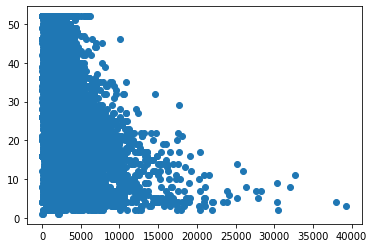

In [48]:
plt.scatter(df.total_rooms, df.housing_median_age)

In [49]:
X2 = df[['total_rooms', 'housing_median_age']].to_numpy()
X2

array([[ 880.,   41.],
       [7099.,   21.],
       [1467.,   52.],
       ...,
       [2254.,   17.],
       [1860.,   18.],
       [2785.,   16.]])

In [50]:
best_dict_2 = get_scores_and_labels(combinations, X2)

Combination (0.01, 2) on iteration 1 of 90 has 1199 clustes. Moving on
Combination (0.01, 5) on iteration 2 of 90 has 0 clustes. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 0 clustes. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 0 clustes. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 0 clustes. Moving on
Combination (0.01, 17) on iteration 6 of 90 has 0 clustes. Moving on
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 1199 clustes. Moving on
Combination (0.08071428571428571, 5) on iteration 8 of 90 has 0 clustes. Moving on
Combination (0.08071428571428571, 8) on iteration 9 of 90 has 0 clustes. Moving on
Combination (0.08071428571428571, 11) on iteration 10 of 90 has 0 clustes. Moving on
Combination (0.08071428571428571, 14) on iteration 11 of 90 has 0 clustes. Moving on
Combination (0.08071428571428571, 17) on iteration 12 of 90 has 0 clustes. Moving on
Combination (0.15142857142857144, 2) on iteration 13 of 90 has 1199 clustes. Mo

In [51]:
best_dict_2

{'best_epsilon': 1.0,
 'best_min_samples': 8,
 'best_labels': array([-1, -1, -1, ..., -1, -1, -1]),
 'best_score': -0.5233492128649596}

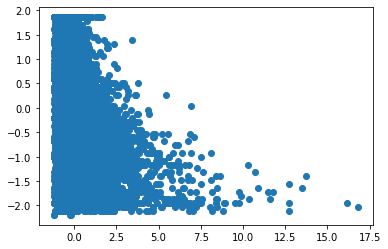

In [53]:
from sklearn.preprocessing import StandardScaler

X2_scaled = StandardScaler().fit_transform(X2)

plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1])

In [54]:
best_dict_3 = get_scores_and_labels(combinations, X2_scaled)

Combination (0.01, 2) on iteration 1 of 90 has 1940 clustes. Moving on
Combination (0.01, 5) on iteration 2 of 90 has 770 clustes. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 440 clustes. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 229 clustes. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 85 clustes. Moving on
Combination (0.01, 17) on iteration 6 of 90 has 53 clustes. Moving on
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 103 clustes. Moving on
Index: 7, Score: 0.04603739637373008, 'Labels: [0 0 0 ... 0 0 0], NumClusters: 28
Index: 8, Score: -0.2497477345868444, 'Labels: [0 2 0 ... 0 0 0], NumClusters: 23
Index: 9, Score: -0.06474545253937586, 'Labels: [ 0 -1  0 ...  0  0  0], NumClusters: 17
Index: 10, Score: -0.20522721709552, 'Labels: [ 0 -1  0 ...  0  0  0], NumClusters: 15
Index: 11, Score: -0.28151920092227467, 'Labels: [ 0 -1  0 ...  0  0  0], NumClusters: 8
Index: 12, Score: 0.20294723650302102, 'Labels: [0 0 0 ... 0 0 0

In [55]:
best_dict_3

{'best_epsilon': 1.0,
 'best_min_samples': 2,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0]),
 'best_score': 0.8999444401810237}

In [57]:
fig = px.scatter(x=X2_scaled[:, 0], y = X2_scaled[:,1], color = best_dict_3['best_labels'])
fig.show()